In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

import csv
import copy
import datetime

In [2]:
def str_to_datetime(timestamp):
  date_parts = timestamp.split(' ')[0].split('-')
  year, month, day = int(date_parts[0]), int(date_parts[1]), int(date_parts[2])
  return datetime.datetime(year=year, month=month, day=day)

In [3]:
def build_df(ticker):
    """
        Build data-frame attaching indexes to historical values

        Parameters:
        ticker (string): stock ticker to build df

        Returns:
        Pandas Data-frame: df
    """
    
    df = pd.read_csv(f'../data/stock-data/{ticker}.SAO.csv')

    df["timestamp"] = df["timestamp"].apply(str_to_datetime)
    df.index = df.pop("timestamp")

    df_reversed = df[::-1]
    df_reversed['7_m_average'] = df_reversed['close'].rolling(window=7).mean()
    df_reversed['40_m_average'] = df_reversed['close'].rolling(window=40).mean()
    df_result = df_reversed[::-1] 
    df_result = df_result.dropna(subset=['7_m_average', '40_m_average'])

    return df_result[::-1]

In [4]:
df_results = pd.read_csv('WEGE3_m_av_sim.csv')
df_results['capital'] = df_results['invested/rescued'] + df_results['remainder']
df_results['position'] = (df_results['capital'] / 1000) * df_results['price']
df_results["date"] = df_results["date"].apply(str_to_datetime)
df_results.index = df_results.pop("date")

df = build_df('WEGE3')

/tmp/ipykernel_20615/3137203152.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reversed['7_m_average'] = df_reversed['close'].rolling(window=7).mean()
/tmp/ipykernel_20615/3137203152.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reversed['40_m_average'] = df_reversed['close'].rolling(window=40).mean()


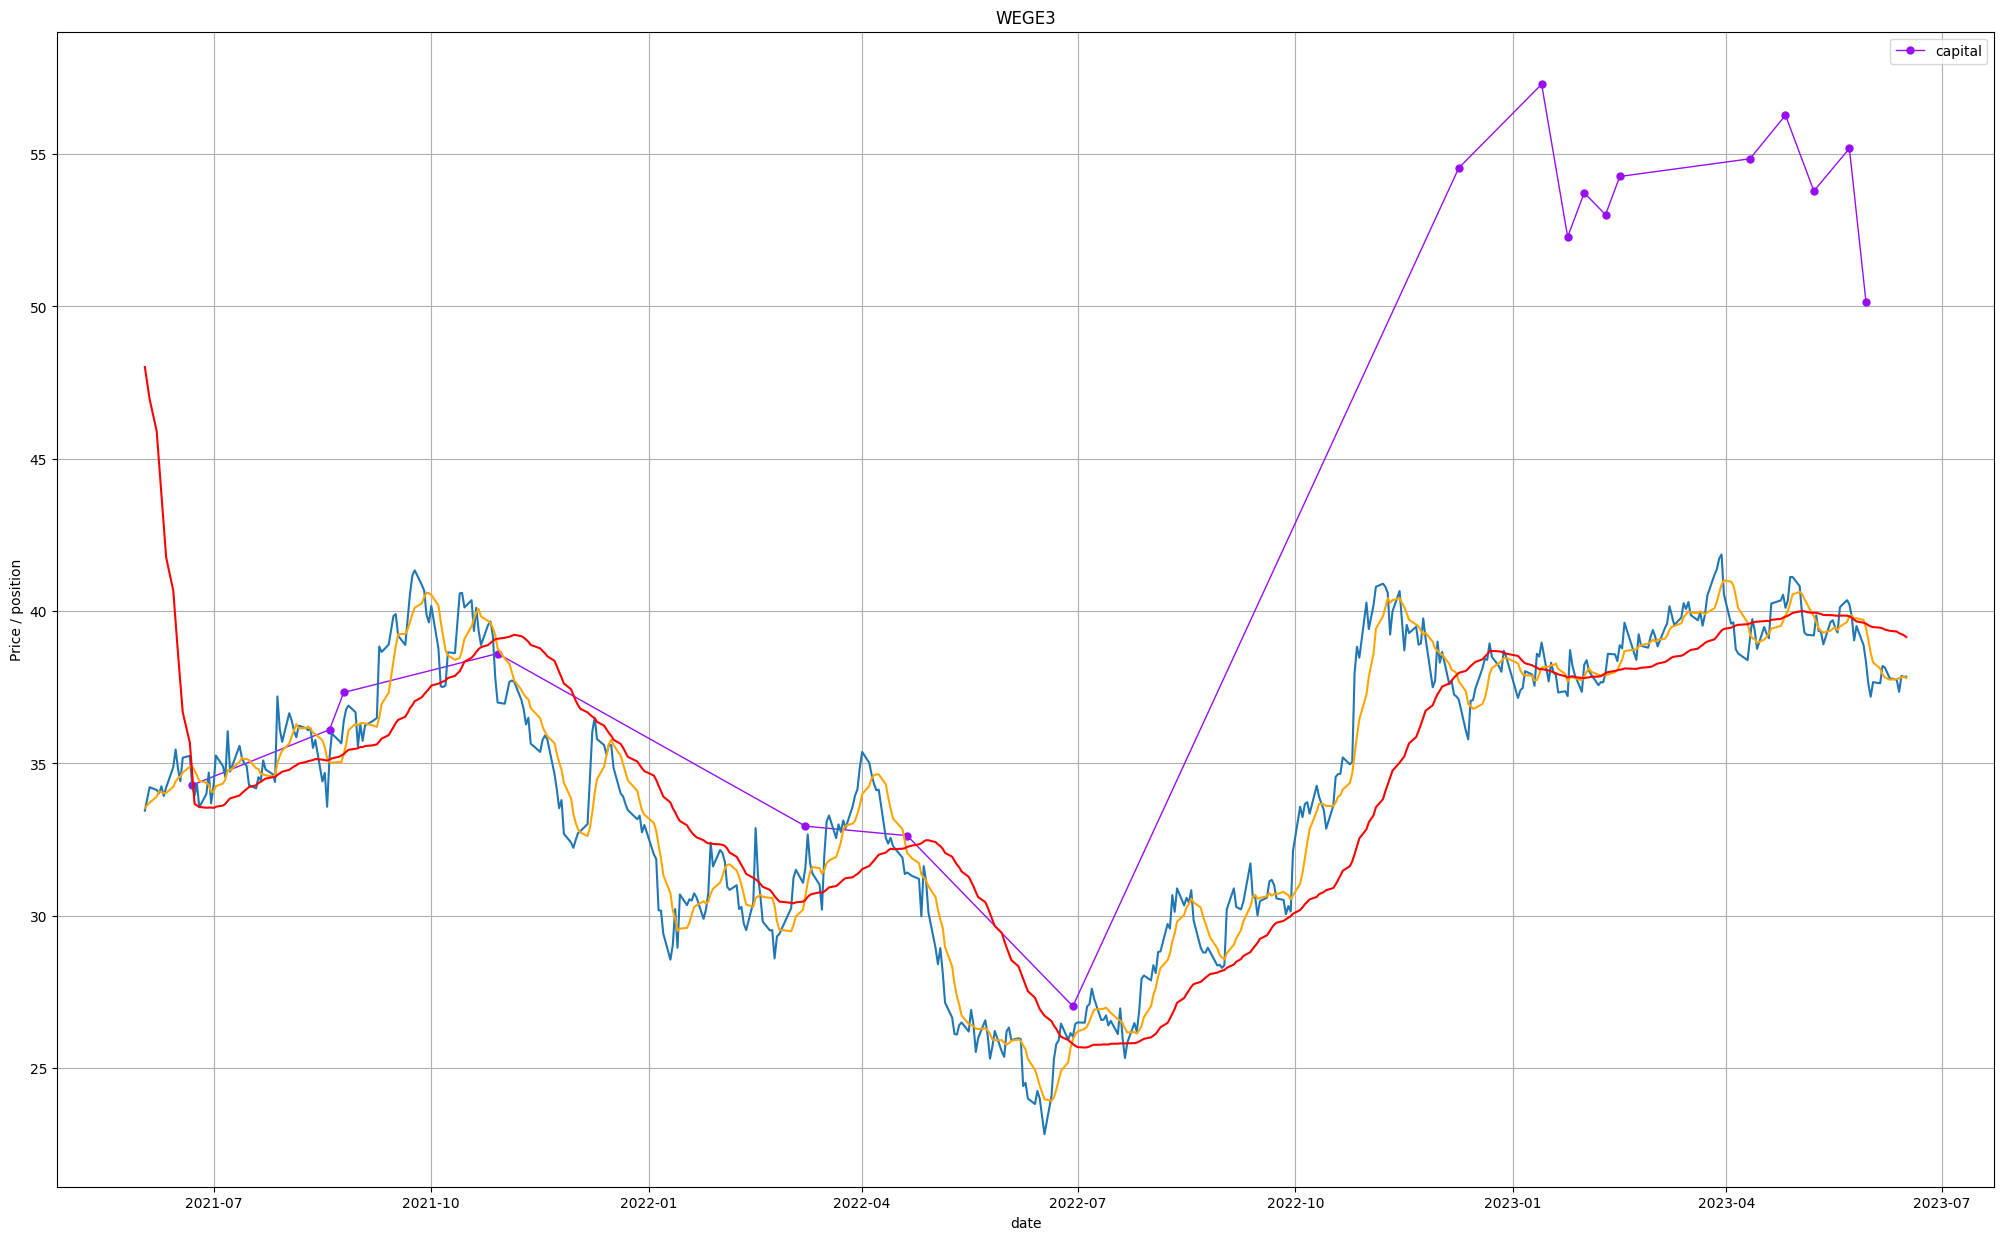

In [6]:
plt.figure(figsize=(25, 15))  # Set the figure size

start_date = str_to_datetime('2021-06-01')
# df_results_filtered = copy.deepcopy(df_results.iloc[df_results.index > start_date])
df_filtered = copy.deepcopy(df.iloc[df.index > start_date])

plt.plot(df_results.index, df_results['position'], marker='o', markersize=5, linewidth=1, color='#970FF2', label='capital')
plt.plot(df_filtered.index, df_filtered['close'])
plt.plot(df_filtered.index, df_filtered['7_m_average'], color="orange")
plt.plot(df_filtered.index, df_filtered['40_m_average'], color="red")

plt.title('WEGE3')
plt.xlabel('date')
plt.ylabel('Price / position')
plt.legend()
# plt.xticks(np.arange('2019-11-07'))
plt.grid(True, which='both')

plt.show()